In [132]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(columns={'Genre': 'Gender'}, inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [135]:
data['Gender']=data["Gender"].apply(lambda x: 1 if x == "Male" else 0)
data = data.drop(['CustomerID'], axis=1)

In [136]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [137]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

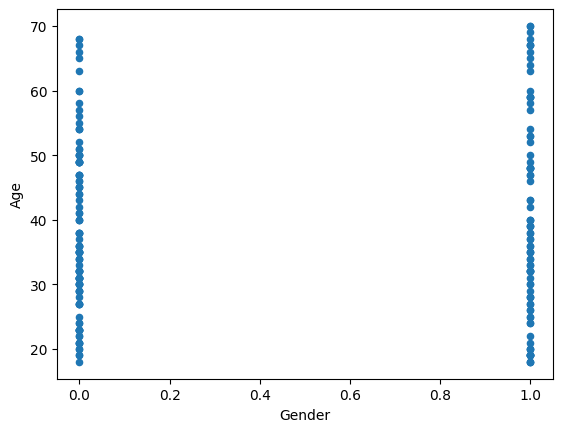

In [139]:
data.plot(kind='scatter', x='Gender', y='Age')
plt.show()

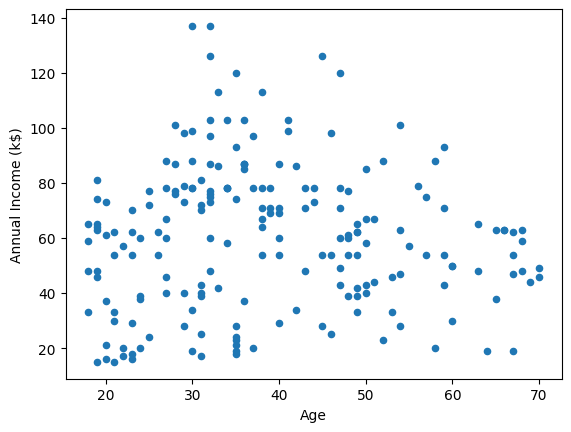

In [140]:
data.plot(kind='scatter', x='Age', y='Annual Income (k$)')
plt.show()

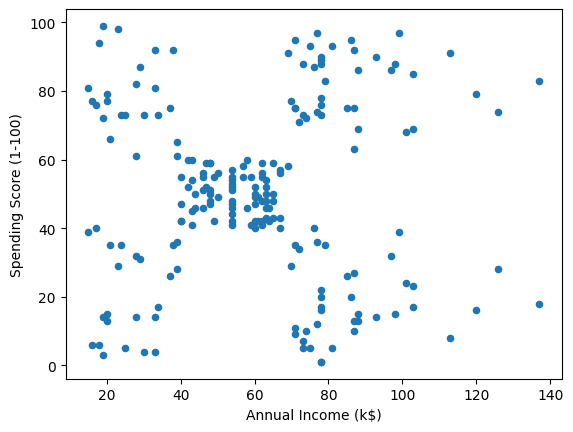

In [141]:
data.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

In [142]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [143]:
sc=StandardScaler()
data_stand = sc.fit_transform(data)
data_stand

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [144]:
#tim cluster

def optimate_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init="auto")
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('so cua cluster')
    plt.ylabel('inerita')
    plt.grid(True)
    plt.show()


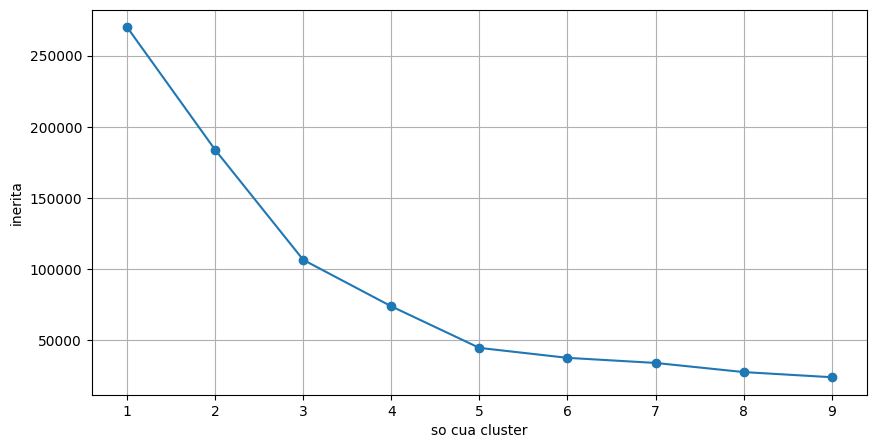

In [145]:
optimate_k_means(data[['Annual Income (k$)', 'Spending Score (1-100)']], 10)

In [146]:
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=3, n_init='auto')

In [147]:
data['kmeans_3'] = kmeans.labels_
data
data2 = data.copy()

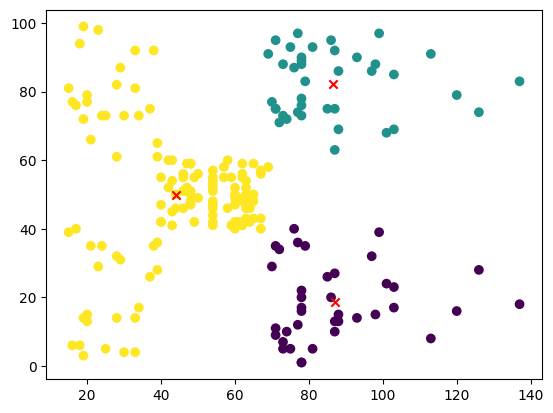

In [148]:
plt.scatter(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], c=data['kmeans_3'])
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red')
plt.show()

In [149]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    data[f'KMeans_{k}'] = kmeans.labels_

In [165]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,1,19,15,39,2,0,0,1,1,4
1,1,21,15,81,2,0,0,1,0,1
2,0,20,16,6,2,0,0,1,1,4
3,0,23,16,77,2,0,0,1,0,1
4,0,31,17,40,2,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...
195,0,35,120,79,1,0,1,2,3,0
196,0,45,126,28,0,0,1,0,2,2
197,1,32,126,74,1,0,1,2,3,0
198,1,32,137,18,0,0,1,0,2,2


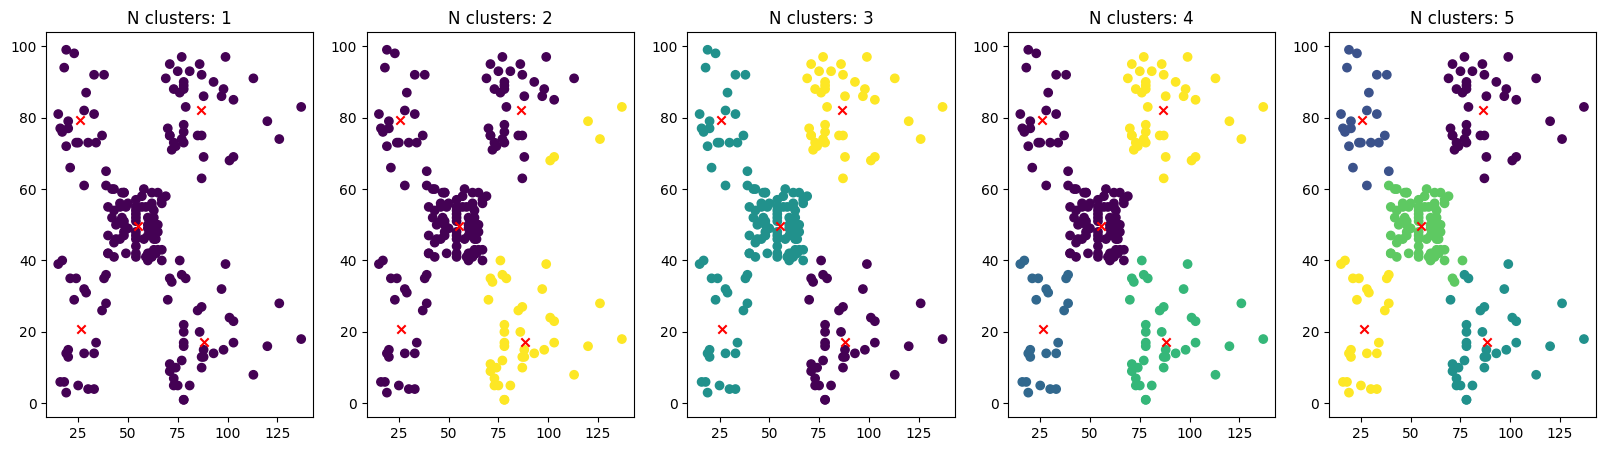

In [151]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
cluster_centers = kmeans.cluster_centers_

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], c=data[f'KMeans_{i}'])
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red')
    ax.set_title(f'N clusters: {i}')

In [152]:
import seaborn as sb # visualization
import numpy as np # working with arrays
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

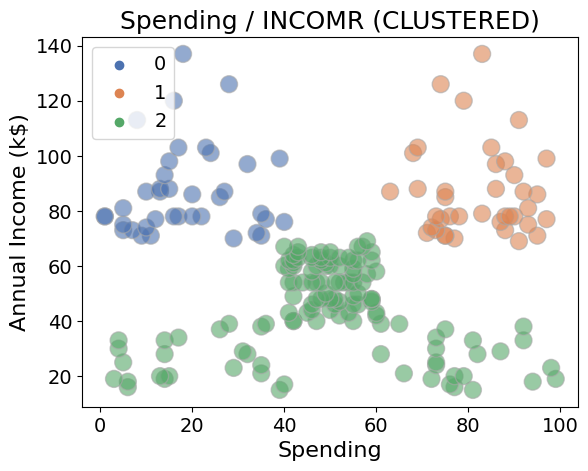

In [166]:
sb.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data = data2, s = 150, hue = 'kmeans_3', palette = 'deep', alpha = 0.6, edgecolor = 'darkgrey')
plt.title('Spending / INCOMR (CLUSTERED)', fontsize = 18)
plt.xlabel('Spending', fontsize = 16)
plt.ylabel('Annual Income (k$)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

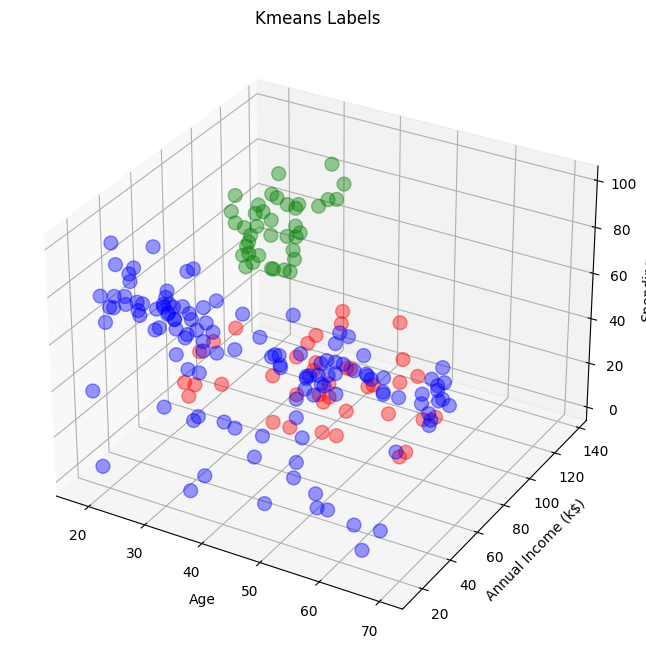

In [174]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending")
ax.set_title("Kmeans Labels")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
    clustered_data = data2[data2['kmeans_3'] == i]
    ax.scatter(clustered_data['Age'], clustered_data['Annual Income (k$)'], clustered_data['Spending Score (1-100)'], c=c, s=100, alpha=0.4)

plt.show()